# Setup and Install Deps

https://www.python.org/

https://www.tensorflow.org/?hl=pt-br

https://keras.io/

https://www.anaconda.com/

In [ ]:
!pip install -q -U tensorflow
!pip install -q -U keras
!pip install -q -U numpy
!pip install -q -U pandas
!pip install -q -U tensorflow-addons
!pip install -q -U keras-utils

#--use-deprecated=legacy-resolver

#!pip install -q -U tensorflow==2.15
#!pip install -q -U keras==2.3.1
#!pip install -q -U numpy pandas==2.0.3 tensorflow-addons keras-utils



ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tf-keras 2.15.1 requires tensorflow<2.16,>=2.15, but you have tensorflow 2.16.1 which is incompatible.
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
cudf-cu12 24.4.1 requires pandas<2.2.2dev0,>=2.0, but you have pandas 2.2.2 which is incompatible.
google-colab 1.0.0 requires pandas==2.0.3, but you have pandas 2.2.2 which is incompatible.


In [ ]:
import os
import keras
import numpy as np
import cv2
import PIL
import glob
import matplotlib.pyplot as plt
import tensorflow as tf
#import keras.layers.convolutional as conv
from keras.layers import Conv2D as conv
from math import sqrt
from PIL import Image
from tensorflow import keras
from numpy import mean
from keras.models import Sequential, load_model
from tensorflow.keras import regularizers, layers, Model
from keras.preprocessing import image
from keras.callbacks import LearningRateScheduler, ReduceLROnPlateau, EarlyStopping
#from keras.utils.vis_utils import plot_model
from keras.utils import plot_model
from keras import backend as B
from tensorflow.keras.layers import BatchNormalization, MaxPool2D, ReLU
from tensorflow.keras import Model
from keras.layers import Dense, Add, Conv1D, Conv2D, MaxPool2D, Flatten, BatchNormalization, Dropout, ZeroPadding2D, MaxPooling2D, Activation, Input, UpSampling2D, AveragePooling2D, Reshape, InputLayer, SeparableConv2D
from tensorflow.keras.optimizers import Adam, Nadam, RMSprop, SGD
from keras.regularizers import l2
from keras.initializers import glorot_uniform
from skimage.feature import peak_local_max
from skimage.morphology import disk
from skimage.segmentation import watershed
from skimage.exposure import equalize_adapthist
from skimage.io import imread
from skimage.color import rgb2gray
from skimage.filters import sobel, rank, median
from skimage.util import img_as_ubyte
from scipy import ndimage as ndi
from scipy.ndimage import distance_transform_edt
import tensorflow_addons as tfa
from sklearn.model_selection import train_test_split
from sklearn.utils import class_weight
from sklearn.metrics import confusion_matrix, accuracy_score
from tensorflow.keras.metrics import *
from keras import backend as K
from sklearn.metrics import precision_recall_fscore_support, f1_score

AttributeError: module 'numpy.linalg._umath_linalg' has no attribute '_ilp64'

# Linear Regression | Boston Housing

https://keras.io/api/datasets/boston_housing/

http://lib.stat.cmu.edu/datasets/boston

Boston house price data from Harrison, D. and Rubinfeld, D.L. for the article 'Hedonic Prices and the Demand for Clean Air', J. Environ. Economics and Management, vol.5, 81-102, 1978.

- Per capita crime rate by city.
- Proportion to residential land zoned in lots over 25,000 square feet.
- Proportion in relation to hectares of non-retail land by city
 - What is the relationship between residential land and commercial land
- Proportion in relation to land allocated with rivers
- Concentration of nitric oxides measured on the ground (parts per 10 million)
 - Amount of trash
- Average number of rooms per dwelling in the same subdivision
 - Quite common to have more rooms left to rent to guests
 - These extra rooms are usually planned / estimated during construction
- Proportion of occupied units (subdivision) and built before 1940
 - Get a sense of how much that area evolved at a specific time
- Weighted distances to five Boston job centers
 - Distance from the subdivision to the centers
- Accessibility index to radial highways
- Average value property tax rate (scaled by 10,000)
- Student to teacher ratio by city
- Proportion of black people per city (per thousand inhabitants)
- Lowest status percentage of population
- Average home value (scaled by 1,000)


The goal is to use linear regression to find the average value of owner-occupied homes at $1,000.

In [ ]:
#Import Libs, modules and Packages

import tensorflow as tf # to create the model, the architeture, of neural network
import numpy as np # Visualize Data

from keras.models import Sequential # I Will use this tool to create my model, Sequencial Layers Model
from keras.layers import Dense # This is the Layer Type used

import matplotlib.pyplot as plt # Graphic View


In [ ]:
print(f'TensorFlow Lib Version: {tf.__version__}')

TensorFlow Lib Version: 2.15.0


In [ ]:
# Load Data Base | # https://keras.io/api/datasets/boston_housing/ # |

data = tf.keras.datasets.boston_housing

# Separate Test Data and Train Data

(x_train, y_train), (x_test, y_test) = data.load_data()


57026/57026 [==============================] - 0s 0us/step


In [ ]:
# Data Type

print(type(x_train))

<class 'numpy.ndarray'>


In [ ]:
# Train Data Format

print(x_train.shape)

# 404 Data Lines
# 13 Different Categories

(404, 13)


In [ ]:
# Test Data Format

print(x_test.shape)

# 102 Samples
# 13 Different Categories

(102, 13)


In [ ]:
# Show First Train Data Sample

print(x_train[0])

[  1.23247   0.        8.14      0.        0.538     6.142    91.7
   3.9769    4.      307.       21.      396.9      18.72   ]


In [ ]:
# Show First Test Data Sample

print(x_test[0])

[ 18.0846   0.      18.1      0.       0.679    6.434  100.       1.8347
  24.     666.      20.2     27.25    29.05  ]


In [ ]:
# Show First Test Data Sample Answer

print(y_test[0])

7.2


In [ ]:
# Normalization Through Mean and Standard Deviation

media = x_train.mean(axis = 0)
desvio = x_train.std( axis = 0 )

x_train = (x_train - media) / desvio
x_test = (x_test - media) / desvio

# DOCS:
# | https://numpy.org/doc/stable/reference/generated/numpy.mean.html
# | https://numpy.org/doc/stable/reference/generated/numpy.std.html

In [ ]:
# MY MODEL:

model = Sequential([
    Dense(
      units = 64,
      activation = 'relu',
      input_shape = [13]
    ),
    Dense(
      units = 64,
      activation = "relu"
    ),
    Dense( units = 1 )
])

# DOCS:
# | https://keras.io/api/models/sequential/#sequential-class
# | https://keras.io/api/layers/core_layers/dense/
# | https://keras.io/api/layers/activations/

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                896       
                                                                 
 dense_1 (Dense)             (None, 64)                4160      
                                                                 
 dense_2 (Dense)             (None, 1)                 65        
                                                                 
Total params: 5121 (20.00 KB)
Trainable params: 5121 (20.00 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


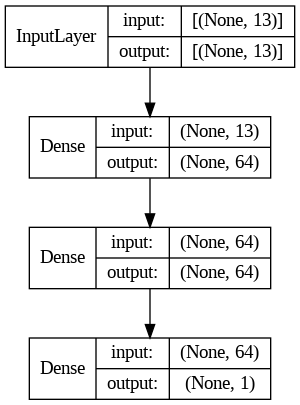

In [ ]:
tf.keras.utils.plot_model(model,
           to_file = 'model.png',
           show_shapes = True,
           show_layer_names = False)

In [ ]:
# OPTIMIZE MODEL ALGORITHM
# RUN WITH MODEL AND OPTIMIZE IN EACH CYCLE GENERATION

model.compile(
    optimizer = "adam",
    loss = "mse", # Mean Squared Error
    metrics = ["mae"] # Mean Absolute Error
    )

# DOCS:
# | https://keras.io/api/optimizers/
# | https://keras.io/api/losses/
# | https://keras.io/api/metrics/

In [ ]:
%time

# TEST MODEL WITH TRAIN DATA

history = model.fit(
    x_train,
    y_train,
    epochs = 100,           # EPOCHS / CYCLES / ROUNDS OF TRAIN
    validation_split = 0.2  # AUTO METRICS OBSERVE 80% OF TRAIN DATA AND 20% OF TEST DATA TO AVALUETA THE QUALITY OF MODEL
)

CPU times: user 5 µs, sys: 0 ns, total: 5 µs
Wall time: 27.7 µs
Epoch 1/100
11/11 [==============================] - 1s 25ms/step - loss: 548.0803 - mae: 21.5817 - val_loss: 586.1551 - val_mae: 22.4430
Epoch 2/100
11/11 [==============================] - 0s 5ms/step - loss: 494.4372 - mae: 20.3510 - val_loss: 529.9390 - val_mae: 21.1902
Epoch 3/100
11/11 [==============================] - 0s 7ms/step - loss: 436.0063 - mae: 18.9292 - val_loss: 462.0464 - val_mae: 19.5998
Epoch 4/100
11/11 [==============================] - 0s 7ms/step - loss: 366.2424 - mae: 17.1297 - val_loss: 380.7783 - val_mae: 17.5347
Epoch 5/100
11/11 [==============================] - 0s 5ms/step - loss: 284.7656 - mae: 14.7783 - val_loss: 287.4145 - val_mae: 14.7860
Epoch 6/100
11/11 [==============================] - 0s 6ms/step - loss: 198.5618 - mae: 11.9324 - val_loss: 198.8594 - val_mae: 11.6096
Epoch 7/100
11/11 [==============================] - 0s 7ms/step - loss: 129.3180 - mae: 9.1528 - val_loss: 135.1

In [ ]:
# HISTORIC

print(history.history.keys())
print(history.history)

dict_keys(['loss', 'mae', 'val_loss', 'val_mae'])
{'loss': [548.080322265625, 494.4371643066406, 436.00628662109375, 366.242431640625, 284.7655944824219, 198.5618438720703, 129.3180389404297, 89.77674102783203, 71.08131408691406, 60.43855667114258, 50.74241256713867, 43.088043212890625, 37.10694122314453, 32.88430404663086, 29.714141845703125, 27.538265228271484, 25.633188247680664, 24.168542861938477, 22.744041442871094, 21.692359924316406, 20.775686264038086, 19.777238845825195, 19.101743698120117, 18.273923873901367, 17.637510299682617, 16.976701736450195, 16.525554656982422, 16.093242645263672, 15.751302719116211, 15.122101783752441, 14.8250732421875, 14.452373504638672, 14.10715103149414, 13.829121589660645, 13.608047485351562, 13.341897964477539, 13.07761287689209, 12.775432586669922, 12.664632797241211, 12.536529541015625, 12.197513580322266, 12.06039810180664, 12.080301284790039, 11.771656036376953, 11.721264839172363, 11.677495956420898, 11.612098693847656, 11.25214958190918, 

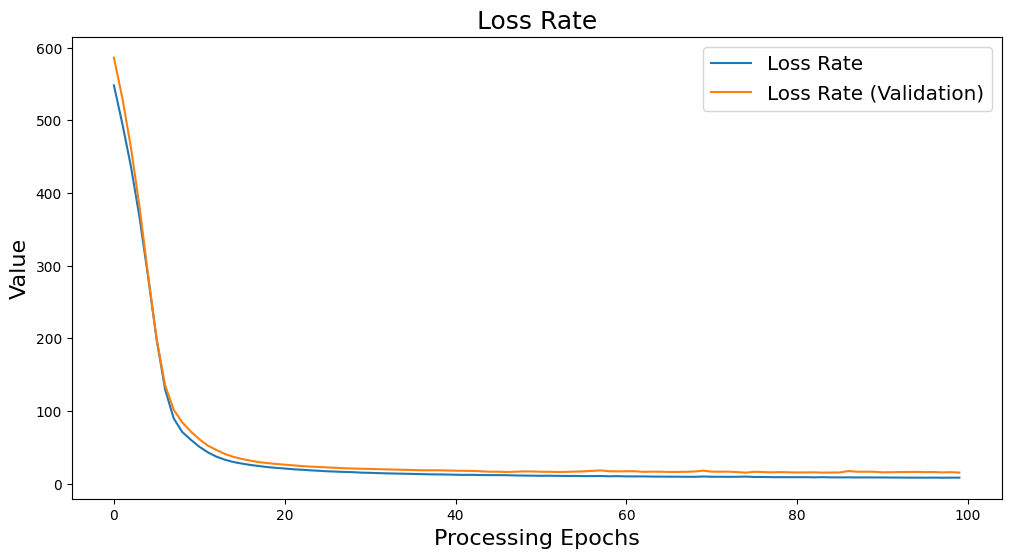

In [26]:
# GRAPH VIEW

plt.rcParams['figure.figsize'] = (12.0, 6.0)  # WIDTH x HEIGHT

plt.plot(history.history['loss'])      # DATA
plt.plot(history.history['val_loss'])  # DATA

plt.legend(['Loss Rate', 'Loss Rate (Validation)'], loc = 'upper right', fontsize = 'x-large')
plt.xlabel('Processing Epochs', fontsize = 16)
plt.ylabel('Value', fontsize=16)
plt.title('Average Loss Rate', fontsize=18)

plt.show()

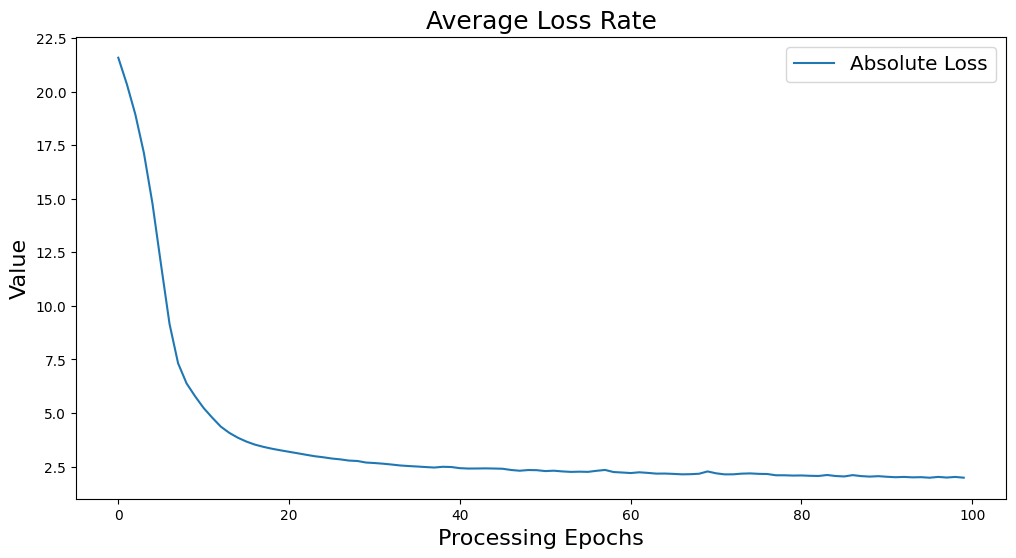

In [27]:
# GRAPH VIEW

plt.rcParams['figure.figsize'] = (12.0, 6.0)  # WIDTH x HEIGHT

plt.plot(history.history['mae']) # DATA

plt.legend(['Absolute Loss'], loc = 'upper right', fontsize = 'x-large')
plt.xlabel('Processing Epochs', fontsize = 16)
plt.ylabel('Value', fontsize=16)
plt.title('Average Loss Rate', fontsize=18)

plt.show()

In [28]:
# USE MODEL IN PRODUCTION
# SIMULATE THAT A CUSTOMER HAS PASSED IN THE DATA OF A HOUSE AND EXPECTS TO RECEIVE THE CORRECT PRICE
# THE LAST CALCULATIONS WERE A TEST TO CALCULATE THE ACCURATE MODEL
# THIS IS A REAL SCENARIO SIMULATION

x_new = x_test[:10]            # INSERT DATA | HOUSE DATA
y_pred = model.predict(x_new)  # CALCULATE BOSTON HOUSE PRICE


1/1 [==============================] - 0s 136ms/step


In [29]:
# RESULT | 1.0 -> $1000,00

print(y_pred[0])

[8.349829]


In [30]:

# SAVE MY MODEL

model.save('/content/drive/MyDrive/Colab Notebooks/regressor.h5')
model.save_weights('/content/drive/MyDrive/Colab Notebooks/regressor_weights.h5')


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [32]:

# RECREATE MY MODEL TO USE AGAIN IN OTHER PLACE

model = Sequential()
model = tf.keras.models.load_model('/content/drive/MyDrive/Colab Notebooks/regressor.h5')
model.load_weights('/content/drive/MyDrive/Colab Notebooks/regressor_weights.h5')

#new_sample = '/content/drive/MyDrive/file.ext'
#test_result = model.predict(new_sample)

#print(test_result)